<a href="https://colab.research.google.com/github/lauramoraes/Analise_de_Clusters/blob/master/7%20-%20Clusteriza%C3%A7%C3%A3o%20por%20K%20Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização por K-Means

In [0]:
suppressMessages(suppressWarnings(library(tidyverse)))

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.1
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


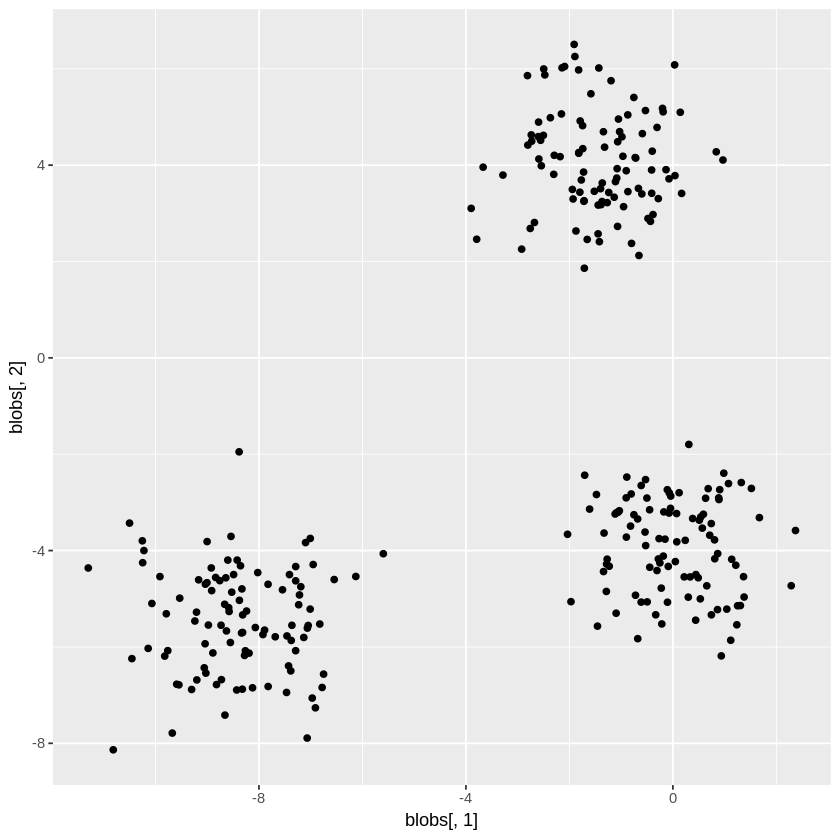

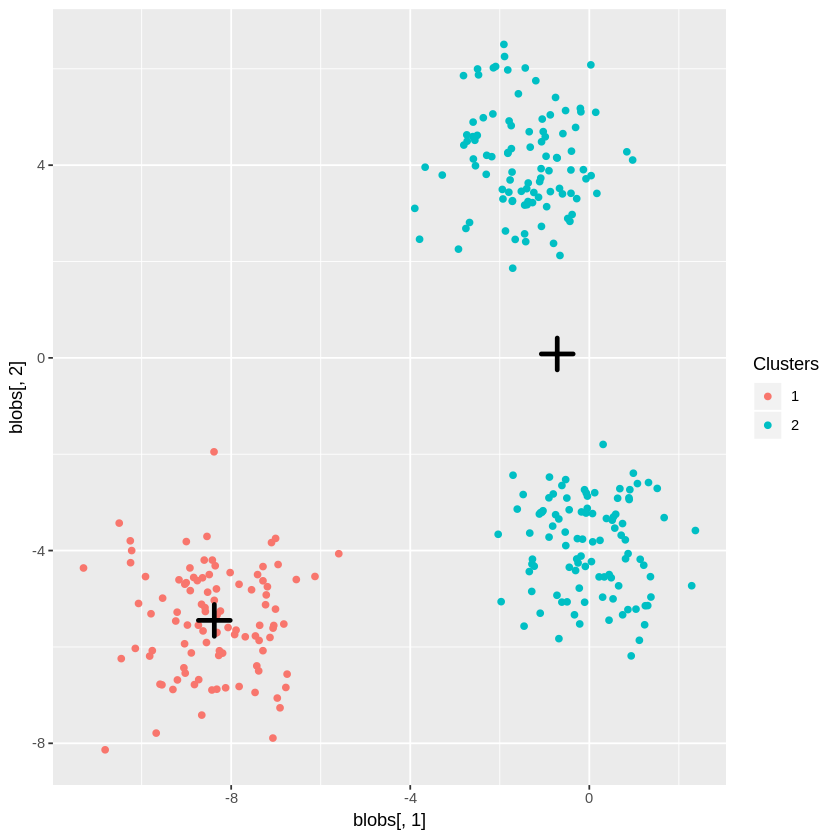

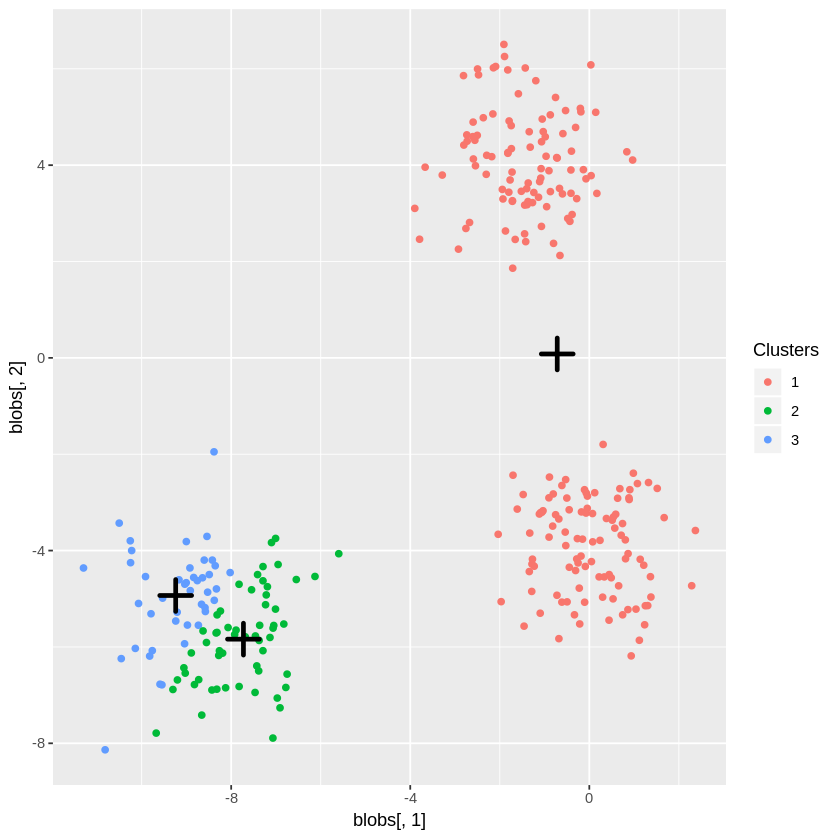

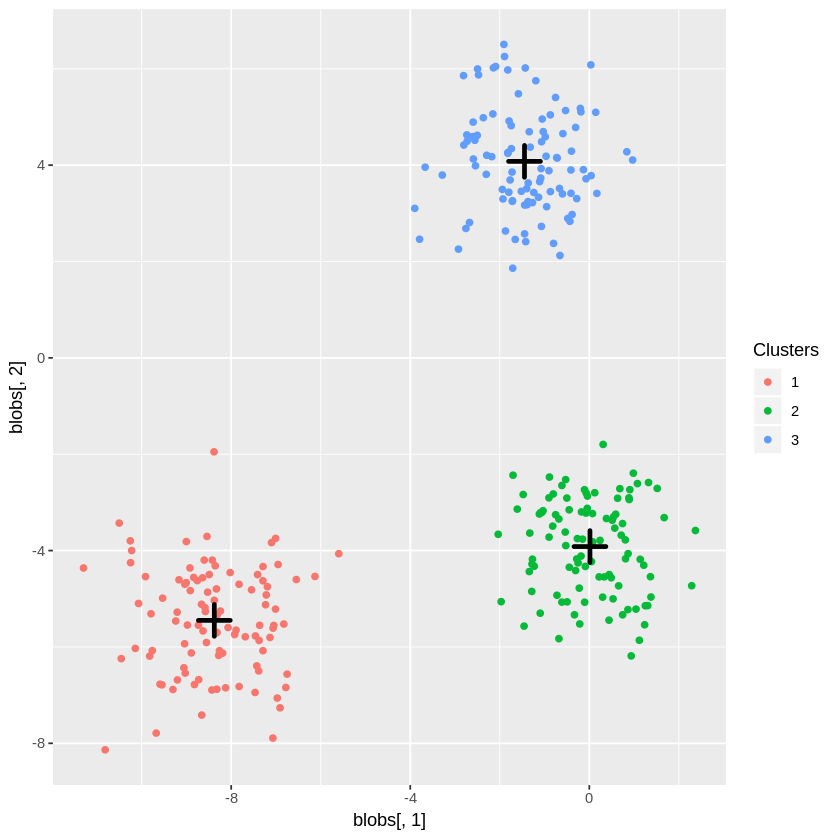

Warning message:
“did not converge in 10 iterations”

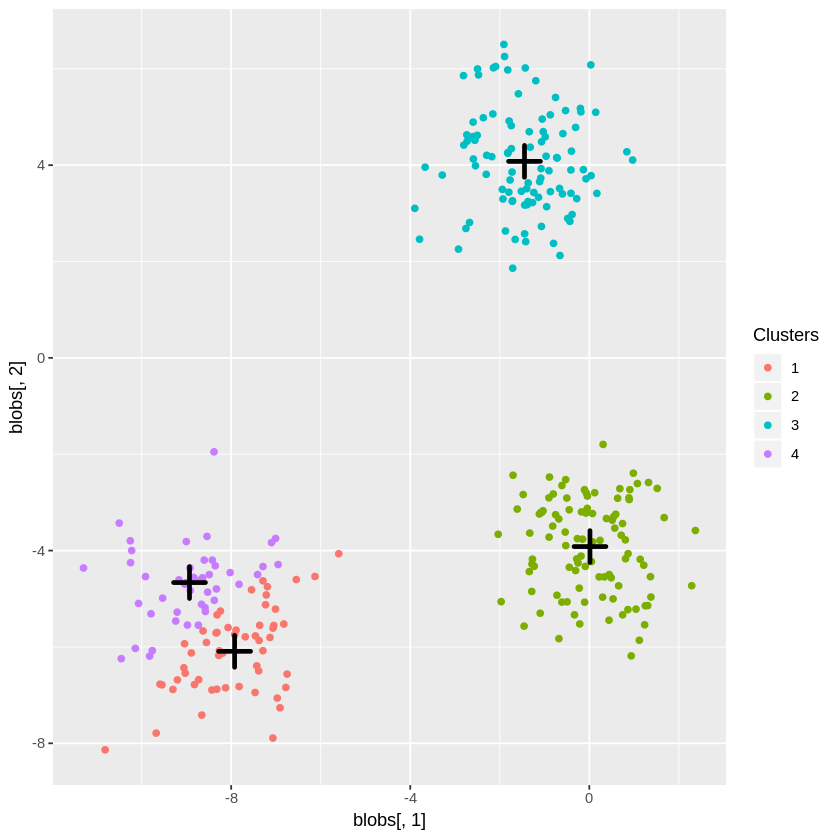

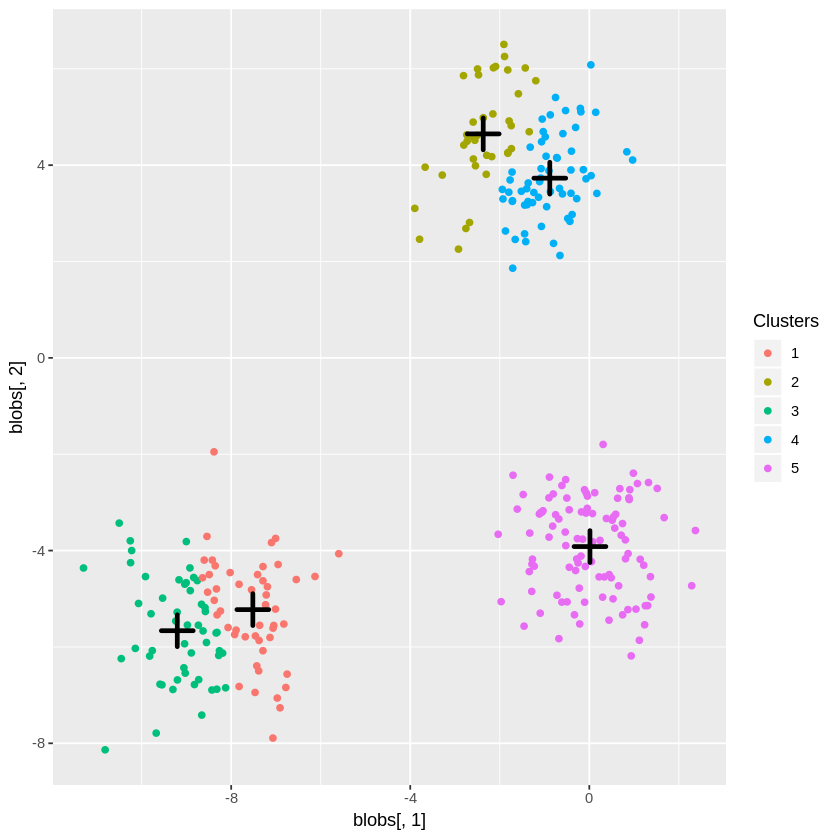

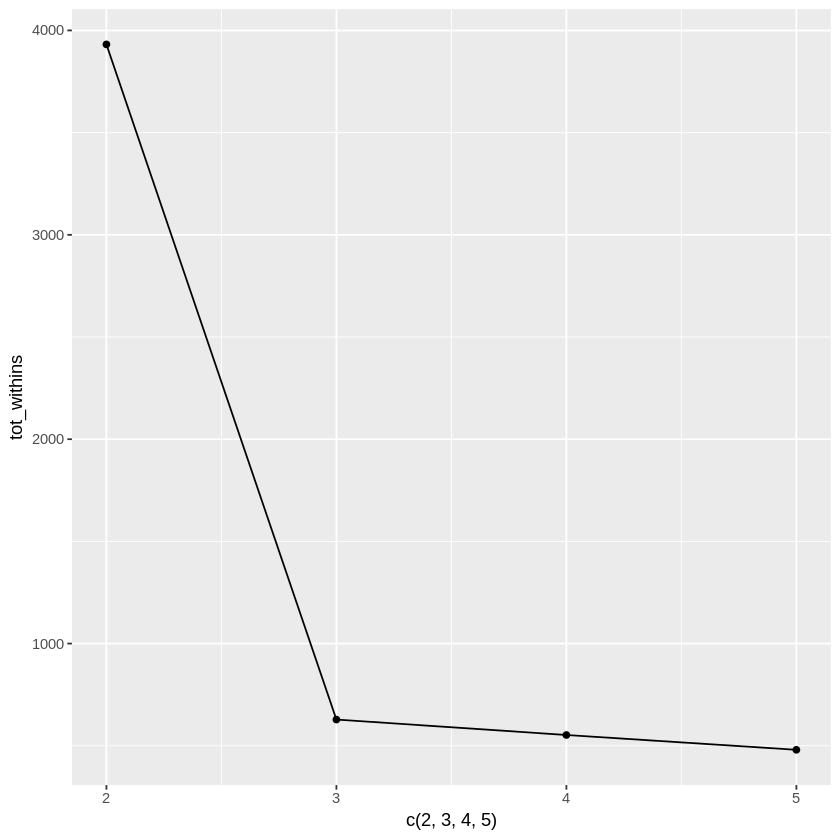

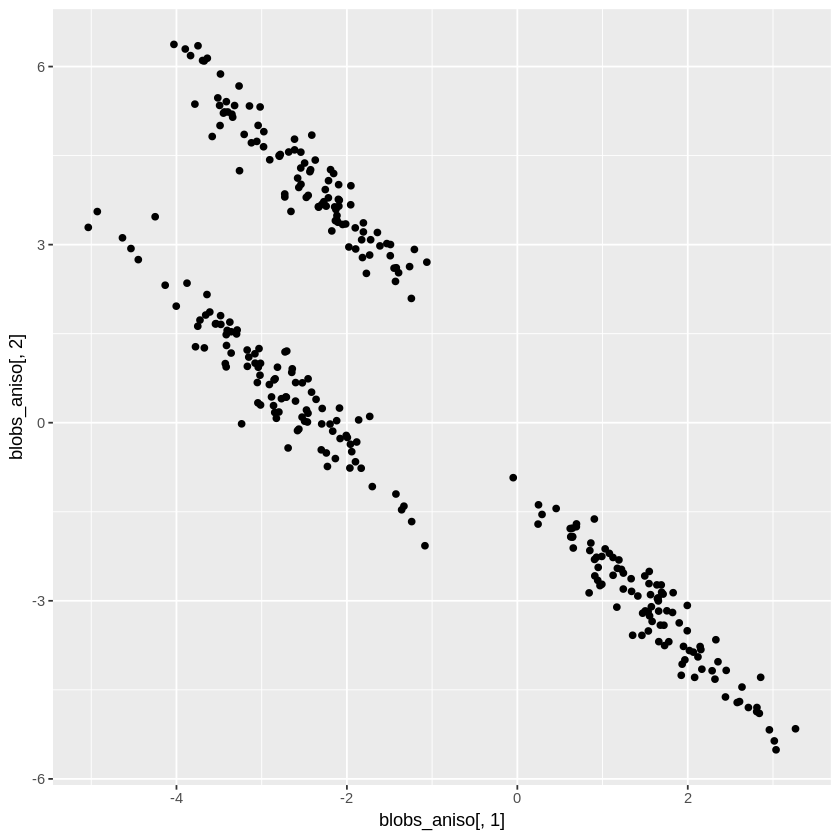

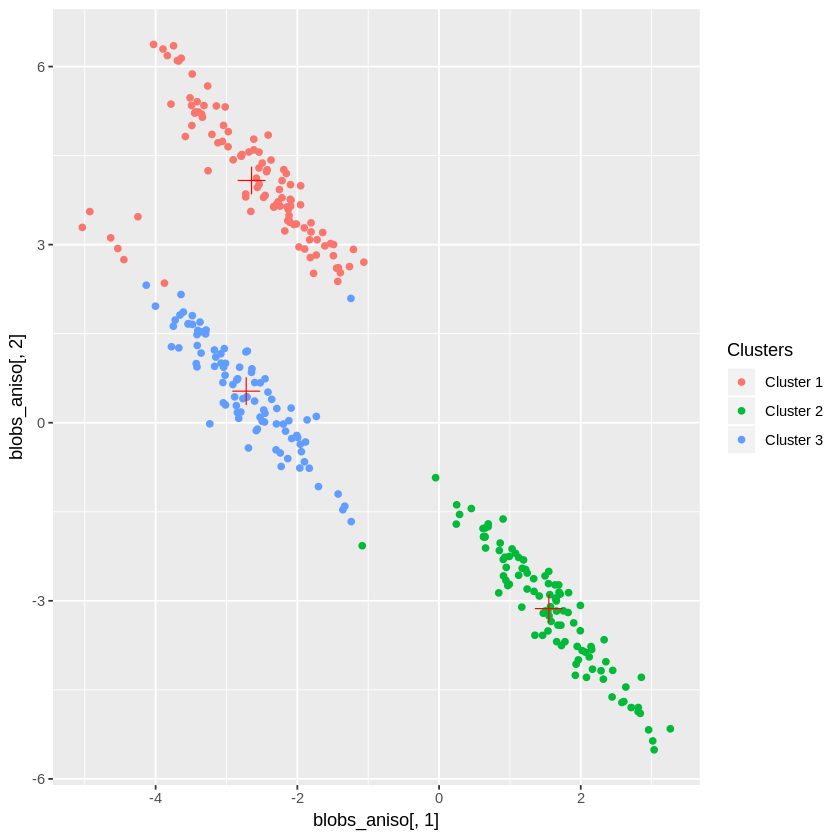

In [1]:
set.seed(10)
center1 = runif(2, min = -10.0, max = 10.0)
center2 = runif(2, min = -10.0, max = 10.0)
center3 = runif(2, min = -10.0, max = 10.0)

blobs = rbind(
  cbind(rnorm(100)+ center1[1], rnorm(100) + center1[2]),
  cbind(rnorm(100)+ center2[1], rnorm(100) + center2[2]),
  cbind(rnorm(100)+ center3[1], rnorm(100) + center3[2])
)
ggplot() + geom_point(aes(x=blobs[, 1], y=blobs[, 2]))

# Exemplo com com poucos clusters
set.seed(110)
clusters_2 = kmeans(blobs, centers = 2, algorithm = "Lloyd")

ggplot() +
  geom_point(aes(x=blobs[, 1], y=blobs[, 2], color=factor(clusters_2$cluster))) + 
  geom_point(aes(x=clusters_2$centers[, 1], y=clusters_2$centers[, 2]), color="black", size=5, shape=3, stroke=2) +
  scale_color_discrete(name = "Clusters")

# Exemplo de caso de má inicialização
set.seed(5)
clusters_3 = kmeans(blobs, centers = 3, algorithm = "Lloyd")
ggplot() +
  geom_point(aes(x=blobs[, 1], y=blobs[, 2], color=factor(clusters_3$cluster))) + 
  geom_point(aes(x=clusters_3$centers[, 1], y=clusters_3$centers[, 2]), color="black", size=5, shape=3, stroke=2) +
  scale_color_discrete(name = "Clusters")

# Exemplo de caso de boa inicialização
set.seed(110)
clusters_3 = kmeans(blobs, centers = 3, algorithm = "Lloyd")
ggplot() +
  geom_point(aes(x=blobs[, 1], y=blobs[, 2], color=factor(clusters_3$cluster))) + 
  geom_point(aes(x=clusters_3$centers[, 1], y=clusters_3$centers[, 2]), color="black", size=5, shape=3, stroke=2) +
  scale_color_discrete(name = "Clusters")

# Exemplo de clusters demais (4)
set.seed(110)
clusters_4 = kmeans(blobs, centers = 4, algorithm = "Lloyd")
ggplot() +
  geom_point(aes(x=blobs[, 1], y=blobs[, 2], color=factor(clusters_4$cluster))) + 
  geom_point(aes(x=clusters_4$centers[, 1], y=clusters_4$centers[, 2]), color="black", size=5, shape=3, stroke=2) +
  scale_color_discrete(name = "Clusters")

# Exemplo de clusters demais (5)
set.seed(111)
clusters_5 = kmeans(blobs, centers = 5, algorithm = "Lloyd")
ggplot() +
  geom_point(aes(x=blobs[, 1], y=blobs[, 2], color=factor(clusters_5$cluster))) + 
  geom_point(aes(x=clusters_5$centers[, 1], y=clusters_5$centers[, 2]), color="black", size=5, shape=3, stroke=2) +
  scale_color_discrete(name = "Clusters")

# Somatorio das distancias intra-clusters
tot_withins = c(
  clusters_2$tot.withinss,
  clusters_3$tot.withinss,
  clusters_4$tot.withinss,
  clusters_5$tot.withinss
)

# Plot do somatório das distâncias intra-clusters para o "elbow method".
ggplot() +
  geom_line(aes(x=c(2, 3, 4, 5), y=tot_withins)) +
  geom_point(aes(x=c(2, 3, 4, 5), y=tot_withins))



# Anisotropic -- exemplo de caso no qual k-means não é uma boa opção

transformation = rbind(c(0.6, -0.6), c(-0.4, 0.8))

blobs_aniso = blobs %*% transformation

ggplot() + geom_point(aes(x=blobs_aniso[, 1], y=blobs_aniso[, 2]))

clusters = kmeans(blobs_aniso, centers = 3)

ggplot() +
  geom_point(aes(x=blobs_aniso[, 1], y=blobs_aniso[, 2], color=factor(clusters$cluster))) + 
  geom_point(aes(x=clusters$centers[, 1], y=clusters$centers[, 2]), color="red", size=5, shape=3) +
  scale_color_discrete(name = "Clusters", labels = c("Cluster 1", "Cluster 2", "Cluster 3")) +
  scale_shape_manual(values=c(16, 4))



# Funcao para testar várias inicializações aleatórias diferentes
find_best_clustering = function(data, k, seed) {
  
  # Inicializa gerador de números aleatórios. Isso garante que duas execuções
  # de find_best_clustering() dêem o mesmo resultado
  set.seed(seed)
  
  # Essa variável vai segurar a melhor clusterização do 
  best_cluster = c()
  best_totwithins = .Machine$double.xmax
  
  for (i in seq(100)) {
    cluster = kmeans(data, centers=k)
    if (cluster$tot.withinss < best_totwithins) {
      best_cluster = cluster
      best_totwithins = cluster$tot.withinss
    }
  }
  return(best_cluster)
}

all_ks = seq(2, 10)

#for (k in all_ks) {
#  
#}
best_3 = find_best_clustering(blobs, 3, 123)
best_4 = find_best_clustering(blobs, 4, 123)
